In [ ]:
pip install matplotlib seaborn



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: C:\Users\reaga\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ------------------------ --------------- 5.0/8.0 MB 25.1 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 26.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 42.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 30.3 MB/s eta 0:00:00


In [33]:
%pip install faker



   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   -------------------------------------- - 1.8/1.9 MB 14.3 MB/s eta 0:00:01
   ---------------------------------------- 1.9/1.9 MB 13.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: C:\Users\reaga\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Data Preprocessing


## Load Dataset


In [71]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../dataset/dataset.csv')

# Inspect the dataset
print(df.head())



   flags                                        instruction category  \
0      B   question about cancelling order {{Order Number}}    ORDER   
1    BQZ  i have a question about cancelling oorder {{Or...    ORDER   
2   BLQZ    i need help cancelling puchase {{Order Number}}    ORDER   
3     BL         I need to cancel purchase {{Order Number}}    ORDER   
4  BCELN  I cannot afford this order, cancel purchase {{...    ORDER   

         intent                                           response  
0  cancel_order  I've understood you have a question regarding ...  
1  cancel_order  I've been informed that you have a question ab...  
2  cancel_order  I can sense that you're seeking assistance wit...  
3  cancel_order  I understood that you need assistance with can...  
4  cancel_order  I'm sensitive to the fact that you're facing f...  


In [72]:
# Count total duplicate occurrences (excluding the first occurrence)
total_duplicates = df.duplicated(subset=["instruction"]).sum()

# # Remove duplicates but keep the first occurrence
# df_unique = df.drop_duplicates(subset=["instruction"], keep="first")

# # Total rows after removing duplicates
# total_rows_after = len(df_unique)

# # Save the cleaned data to a new CSV file
# df_unique.to_csv("cleaned_file.csv", index=False)

# Print results
print(f"Total Rows Before Removing Duplicates: {total_duplicates}")
# print(f"Total Duplicate Occurrences Removed: {total_duplicates}")
# print(f"Total Rows After Removing Duplicates: {total_rows_after}")
# print("Cleaned file saved as 'cleaned_file.csv'.")


Total Rows Before Removing Duplicates: 2237


## Text Cleaning


In [73]:

# Lowercase the 'text' column
df['category'] = df['category'].str.lower()
# Lowercase all column names
df.columns = df.columns.str.lower()


print(df.head())


   flags                                        instruction category  \
0      B   question about cancelling order {{Order Number}}    order   
1    BQZ  i have a question about cancelling oorder {{Or...    order   
2   BLQZ    i need help cancelling puchase {{Order Number}}    order   
3     BL         I need to cancel purchase {{Order Number}}    order   
4  BCELN  I cannot afford this order, cancel purchase {{...    order   

         intent                                           response  
0  cancel_order  I've understood you have a question regarding ...  
1  cancel_order  I've been informed that you have a question ab...  
2  cancel_order  I can sense that you're seeking assistance wit...  
3  cancel_order  I understood that you need assistance with can...  
4  cancel_order  I'm sensitive to the fact that you're facing f...  


In [74]:
# Count total duplicate occurrences (excluding the first occurrence)
total_duplicates = df.duplicated(subset=["instruction"]).sum()

# # Remove duplicates but keep the first occurrence
# df_unique = df.drop_duplicates(subset=["instruction"], keep="first")

# # Total rows after removing duplicates
# total_rows_after = len(df_unique)

# # Save the cleaned data to a new CSV file
# df_unique.to_csv("cleaned_file.csv", index=False)

# Print results
print(f"Total Rows Before Removing Duplicates: {total_duplicates}")
# print(f"Total Duplicate Occurrences Removed: {total_duplicates}")
# print(f"Total Rows After Removing Duplicates: {total_rows_after}")
# print("Cleaned file saved as 'cleaned_file.csv'.")


Total Rows Before Removing Duplicates: 2237


## NER


In [76]:
import pandas as pd
import re
from collections import Counter


# Detect rows with placeholders
df['has_placeholder'] = df['instruction'].str.contains(r'\{\{.*?\}\}')

# Count rows with placeholders
rows_with_placeholders = df['has_placeholder'].sum()

# Extract placeholders function
def extract_placeholders(text):
    return re.findall(r'\{\{(.*?)\}\}', text)

# Apply function and get all placeholders
placeholders = df[df['has_placeholder']]['instruction'].apply(extract_placeholders).explode()

# Count occurrences of each placeholder
placeholder_counts = Counter(placeholders)

# Convert to DataFrame
placeholder_df = pd.DataFrame.from_dict(placeholder_counts, orient='index', columns=['count'])

# Display initial results
print(f"Rows with placeholders: {rows_with_placeholders}")
print("\nInitial Distribution of Placeholders:")
print(placeholder_df.sort_values(by='count', ascending=False))

# Print total rows and missing values
print("\nTotal rows in the dataset:", len(df))
print("\nMissing values per column:")
print(df.isnull().sum())

# Remove placeholders with the lowest occurrence
if not placeholder_df.empty:
    min_count = placeholder_df['count'].min()  # Find the lowest count
    placeholder_df = placeholder_df[placeholder_df['count'] > min_count]  # Keep only placeholders with higher counts

# Display updated results
print("\nUpdated Distribution of Placeholders (After Removing Lowest Occurrences):")
print(placeholder_df.sort_values(by='count', ascending=False))


Rows with placeholders: 6670

Initial Distribution of Placeholders:
                  count
Order Number       2907
Account Type       1011
Person Name         887
Account Category    822
Refund Amount       624
Currency Symbol     372
Delivery City       234
Delivery Country    177
Invoice Number        8

Total rows in the dataset: 26872

Missing values per column:
flags              0
instruction        0
category           0
intent             0
response           0
has_placeholder    0
dtype: int64

Updated Distribution of Placeholders (After Removing Lowest Occurrences):
                  count
Order Number       2907
Account Type       1011
Person Name         887
Account Category    822
Refund Amount       624
Currency Symbol     372
Delivery City       234
Delivery Country    177


In [80]:
import pandas as pd

# Total rows before removing duplicates
total_rows_before = len(df)

# Count total duplicate occurrences (excluding the first occurrence)
total_duplicates = df.duplicated(subset=["instruction"]).sum()

# Remove duplicates but keep the first occurrence
df = df.drop_duplicates(subset=["instruction"], keep="first")

# Total rows after removing duplicates
total_rows_after = len(df)

# Save the cleaned data to a new CSV file
df.to_csv("cleaned_file.csv", index=False)

# Print results
print(f"Total Rows Before Removing Duplicates: {total_rows_before}")
print(f"Total Duplicate Occurrences Removed: {total_duplicates}")
print(f"Total Rows After Removing Duplicates: {total_rows_after}")
print("Cleaned file saved as 'cleaned_file.csv'.")


Total Rows Before Removing Duplicates: 24635
Total Duplicate Occurrences Removed: 0
Total Rows After Removing Duplicates: 24635
Cleaned file saved as 'cleaned_file.csv'.


In [81]:
import re
import pandas as pd
from faker import Faker

# Initialize Faker
fake = Faker()

# Define synthetic data generators
data_generators = {
    'order number': lambda: fake.unique.bothify(text='ORD-#####'),
    'account type': lambda: fake.random_element(elements=('Business', 'Personal')),
    'person name': lambda: fake.name(),
    'account category': lambda: fake.random_element(elements=('Category A', 'Category B', 'Category C')),
    'refund amount': lambda: f"${fake.random_number(digits=3)}.00",
    'currency symbol': lambda: fake.currency_symbol(),
    'delivery city': lambda: fake.city(),
    'delivery country': lambda: fake.country(),
    'invoice number': lambda: fake.unique.bothify(text='INV###')
}

# Function to replace placeholders and track NER labels
def replace_placeholders(text, data_generators):
    if pd.isnull(text):
        return text, []  # Return empty list for NER labels

    placeholder_pattern = re.compile(r'\{\{(.*?)\}\}')  # Match placeholders {{...}}
    placeholders = placeholder_pattern.findall(text)
    ner_labels = []  # Store entity labels

    for placeholder in placeholders:
        placeholder_cleaned = placeholder.strip().lower()  # Normalize case
        if placeholder_cleaned in data_generators:
            replacement_value = data_generators[placeholder_cleaned]()  # Generate synthetic data
            text = text.replace(f'{{{{{placeholder}}}}}', replacement_value, 1)  # Replace placeholder

            # Append entity info in required format
            ner_labels.append({'text': replacement_value, 'label': placeholder_cleaned.replace(" ", "_")})

    return text, ner_labels

# Apply the placeholder replacement function
df[['instruction', 'ner_labels']] = df['instruction'].apply(
    lambda x: pd.Series(replace_placeholders(x, data_generators))
)

# Ensure all rows are retained, even if ner_labels is empty
df['ner_labels'] = df.apply(lambda row: row['ner_labels'] if row['has_placeholder'] else [], axis=1)

print(df.head())


   flags                                        instruction category  \
0      B          question about cancelling order ORD-50987    order   
1    BQZ  i have a question about cancelling oorder ORD-...    order   
2   BLQZ           i need help cancelling puchase ORD-96544    order   
3     BL                I need to cancel purchase ORD-63076    order   
4  BCELN  I cannot afford this order, cancel purchase OR...    order   

         intent                                           response  \
0  cancel_order  I've understood you have a question regarding ...   
1  cancel_order  I've been informed that you have a question ab...   
2  cancel_order  I can sense that you're seeking assistance wit...   
3  cancel_order  I understood that you need assistance with can...   
4  cancel_order  I'm sensitive to the fact that you're facing f...   

   has_placeholder                                        ner_labels  
0             True  [{'text': 'ORD-50987', 'label': 'order_number'}]  
1   

In [83]:
# Count total duplicate occurrences (excluding the first occurrence)
total_duplicates = df.duplicated(subset=["instruction"]).sum()

# # Remove duplicates but keep the first occurrence
# df_unique = df.drop_duplicates(subset=["instruction"], keep="first")

# # Total rows after removing duplicates
# total_rows_after = len(df_unique)

# # Save the cleaned data to a new CSV file
# df_unique.to_csv("cleaned_file.csv", index=False)

# Print results
print(f"Total Rows Before Removing Duplicates: {total_duplicates}")
# print(f"Total Duplicate Occurrences Removed: {total_duplicates}")
# print(f"Total Rows After Removing Duplicates: {total_rows_after}")
# print("Cleaned file saved as 'cleaned_file.csv'.")


Total Rows Before Removing Duplicates: 0


## Function to Create BIO Tags


In [ ]:
import re

# Function to generate BIO tags
def generate_bio_tags(instruction, ner_labels):
    # Tokenize the instruction into words using regex to handle punctuation
    tokens = re.findall(r'\w+|[^\w\s]', instruction)
    
    # Initialize BIO tags as 'O' (Outside) for all tokens
    bio_tags = ['O'] * len(tokens)
    
    # Process each entity in ner_labels
    for entity in ner_labels:
        entity_text = entity['text']
        entity_label = entity['label']
        
        # Tokenize the entity text using the same regex
        entity_tokens = re.findall(r'\w+|[^\w\s]', entity_text)
        
        # Find the start index of the entity in the instruction
        try:
            # Create a sliding window to find the entity tokens in the instruction tokens
            for i in range(len(tokens) - len(entity_tokens) + 1):
                if tokens[i:i + len(entity_tokens)] == entity_tokens:
                    # Assign BIO tags
                    for j in range(len(entity_tokens)):
                        if j == 0:
                            bio_tags[i + j] = f"B-{entity_label}"  # Beginning of the entity
                        else:
                            bio_tags[i + j] = f"I-{entity_label}"  # Inside the entity
                    break  # Stop after finding the first match
        except Exception as e:
            # If the entity text is not found in the tokens, log the error
            print(f"Error processing entity '{entity_text}' in instruction: {instruction}")
            continue
    
    return tokens, bio_tags


In [ ]:
# Apply the BIO tag generation function
df['bio_tags'] = df.apply(lambda row: generate_bio_tags(row['instruction'], row['ner_labels']), axis=1)

# Split the result into separate columns for tokens and tags
df[['tokens', 'tags']] = pd.DataFrame(df['bio_tags'].tolist(), index=df.index)

# Drop the intermediate 'bio_tags' column
df.drop(columns=['bio_tags'], inplace=True)

# Display the final DataFrame
print(df[['instruction', 'ner_labels', 'tokens', 'tags']])


                                             instruction  \
0              question about cancelling order ORD-50987   
1      i have a question about cancelling oorder ORD-...   
2               i need help cancelling puchase ORD-96544   
3                    I need to cancel purchase ORD-63076   
4      I cannot afford this order, cancel purchase OR...   
...                                                  ...   
26864   I have got to see my compensation current status   
26866        check the current status of my compensation   
26868  how to see if there is anything wrong with my ...   
26870  I don't know what to do to see my reimbursemen...   
26871  I need to know if there is anything new on the...   

                                             ner_labels  \
0      [{'text': 'ORD-50987', 'label': 'order_number'}]   
1      [{'text': 'ORD-22002', 'label': 'order_number'}]   
2      [{'text': 'ORD-96544', 'label': 'order_number'}]   
3      [{'text': 'ORD-63076', 'label': 'ord

In [ ]:
# Initialize a counter for mismatched examples
mismatch_count = 0
NER_LABELS =  ['O', 'B-order_number', 'I-order_number', 'B-refund_amount', 'I-refund_amount', 'B-account_type', 'I-account_type','B-person_name', 'I-person_name', 'B-account_category', 'I-account_category', 'B-currency_symbol','I-currency_symbol', 'B-delivery_country',  'I-delivery_country', 'B-delivery_city', 'I-delivery_city']
NER_LABELS_TO_IDX = {label: idx for idx, label in enumerate(NER_LABELS)}
IDX_TO_NER_LABELS = {idx: label for label, idx in NER_LABELS_TO_IDX.items()}

# Function to validate alignment between tokens and tags
def validate_alignment(example):
    global mismatch_count  # Use the global counter
    
    tokens = example['tokens']
    tags = example['tags']
    
    # Check if lengths match
    if len(tokens) != len(tags):
        mismatch_count += 1  # Increment the mismatch counter
        print(f"Warning: Mismatched lengths - Tokens: {len(tokens)}, Tags: {len(tags)}")
        print(f"Tokens: {tokens}")
        print(f"Tags: {tags}")
        return False  # Exclude this example from the dataset
    
    # Ensure all tags are valid
    for tag in tags:
        if tag not in NER_LABELS_TO_IDX:
            print(f"Warning: Invalid tag '{tag}' in example.")
            return False  # Exclude this example from the dataset
    
    return True  # Include this example in the dataset

# Filter the dataset to include only aligned examples
df = df[df.apply(validate_alignment, axis=1)]

# Print the total number of mismatched examples
print(f"Total number of mismatched examples: {mismatch_count}")
print(f"Number of valid examples after filtering: {len(df)}")


Total number of mismatched examples: 0
Number of valid examples after filtering: 24635


In [102]:

df.to_csv('output.csv', index=False)


In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df' and the column is named 'category'
category_counts = df['category'].value_counts()


# Print the category counts as a table
print("Category Counts:\n", category_counts)


Category Counts:
 category
ACCOUNT         2989
INVOICE         1999
CONTACT         1999
PAYMENT         1998
FEEDBACK        1997
REFUND          1994
SHIPPING        1970
DELIVERY         999
SUBSCRIPTION     999
ORDER            998
CANCEL           950
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df' and the column is named 'category'
category_counts = df['intent'].value_counts()


# Print the category counts as a table
print("Category Counts:\n", category_counts)


Category Counts:
 intent
check_invoice               1000
complaint                   1000
contact_customer_service    1000
delivery_period              999
newsletter_subscription      999
check_payment_methods        999
contact_human_agent          999
registration_problems        999
get_invoice                  999
payment_issue                999
place_order                  998
review                       997
set_up_shipping_address      997
get_refund                   997
check_refund_policy          997
recover_password             995
delete_account               995
change_shipping_address      973
check_cancellation_fee       950
Name: count, dtype: int64


In [ ]:
# List of intents to drop
intents_to_drop = [
    'create_account',
    'change_order',
    'switch_account',
    'track_order',
    'edit_account',
    'track_refund',
    'delivery_options',
    'cancel_order'
]

# Drop rows where 'intent' is in the list of intents to drop
df = df[~df['intent'].isin(intents_to_drop)]

# Display the updated DataFrame
print(df)


      flags                                        instruction  category  \
1995     BL  give me information about a delivery address m...  SHIPPING   
1996    BLQ                          need to update my address  SHIPPING   
1997    BCL               I entered a wrong address, update it  SHIPPING   
1998   BLQZ              i have an trouble editing the address  SHIPPING   
1999     BL                help modifying the shipping address  SHIPPING   
...     ...                                                ...       ...   
23874   BIL  what do I need to do to set my shipping addres...  SHIPPING   
23875    BL                issue entering the shipping address  SHIPPING   
23876   BLM  there are errors setting up a different shippi...  SHIPPING   
23877  BCLP  I would like to set up the new shipping addres...  SHIPPING   
23878   BIL    can you help me set up my new shipping address?  SHIPPING   

                        intent  \
1995   change_shipping_address   
1996   change_shipp

In [ ]:
# Group by 'intent' and 'category' and count the occurrences
intent_category_counts = df.groupby(['intent', 'category']).size().reset_index(name='count')

# Sort by 'category' and then by 'count' in descending order
intent_category_counts = intent_category_counts.sort_values(by=['category', 'count'], ascending=[True, False])

# Display the result
print(intent_category_counts)


                      intent      category  count
16     registration_problems       ACCOUNT    999
8             delete_account       ACCOUNT    995
15          recover_password       ACCOUNT    995
1     check_cancellation_fee        CANCEL    950
6   contact_customer_service       CONTACT   1000
7        contact_human_agent       CONTACT    999
9            delivery_period      DELIVERY    999
5                  complaint      FEEDBACK   1000
17                    review      FEEDBACK    997
2              check_invoice       INVOICE   1000
10               get_invoice       INVOICE    999
14               place_order         ORDER    998
3      check_payment_methods       PAYMENT    999
13             payment_issue       PAYMENT    999
4        check_refund_policy        REFUND    997
11                get_refund        REFUND    997
18   set_up_shipping_address      SHIPPING    997
0    change_shipping_address      SHIPPING    973
12   newsletter_subscription  SUBSCRIPTION    999


In [ ]:
# List of intents to drop
intents_to_drop = [
    'registration_problems',
    'check_cancellation_fee',
    'delivery_period',
    'place_order',
    'newsletter_subscription'
]

# Drop rows where 'intent' is in the list of intents to drop
df = df[~df['intent'].isin(intents_to_drop)]



# Display the updated DataFrame
print(df)


      flags                                        instruction  category  \
1995     BL  give me information about a delivery address m...  SHIPPING   
1996    BLQ                          need to update my address  SHIPPING   
1997    BCL               I entered a wrong address, update it  SHIPPING   
1998   BLQZ              i have an trouble editing the address  SHIPPING   
1999     BL                help modifying the shipping address  SHIPPING   
...     ...                                                ...       ...   
23874   BIL  what do I need to do to set my shipping addres...  SHIPPING   
23875    BL                issue entering the shipping address  SHIPPING   
23876   BLM  there are errors setting up a different shippi...  SHIPPING   
23877  BCLP  I would like to set up the new shipping addres...  SHIPPING   
23878   BIL    can you help me set up my new shipping address?  SHIPPING   

                        intent  \
1995   change_shipping_address   
1996   change_shipp

In [ ]:
# Get the total number of unique intent labels
unique_intent_count = df['intent'].nunique()

# Display the result
print(f'Total unique intent labels: {unique_intent_count}')


Total unique intent labels: 14


In [ ]:
df.to_csv('final_output.csv', index=False)


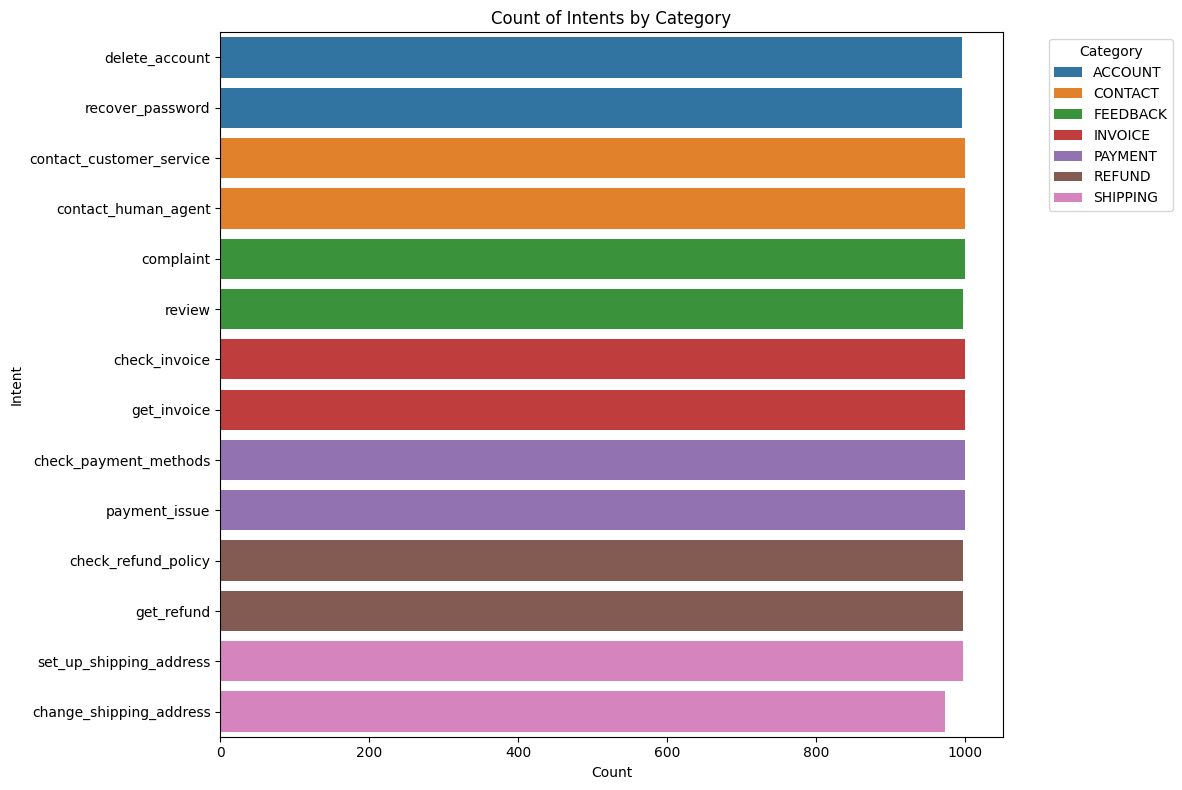

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# Group by 'intent' and 'category' and count the occurrences
intent_category_counts = df.groupby(['intent', 'category']).size().reset_index(name='count')

# Sort by 'category' and then by 'count' in descending order
intent_category_counts = intent_category_counts.sort_values(by=['category', 'count'], ascending=[True, False])

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='intent', hue='category', data=intent_category_counts, dodge=False)

# Adding labels and title
plt.xlabel('Count')
plt.ylabel('Intent')
plt.title('Count of Intents by Category')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()
